In [4]:
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv('emails.csv')

In [6]:
df = data.copy()

In [7]:
df.shape

(5172, 3002)

In [8]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [9]:
#input data
x=df.drop(['Email No.', 'Prediction'],axis = 1)

#output data
y=df['Prediction']

In [10]:
set(x.dtypes)

{dtype('int64')}

<Axes: xlabel='Prediction', ylabel='count'>

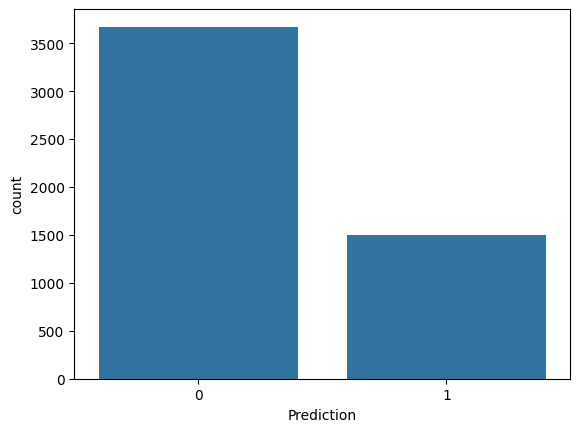

In [11]:
sns.countplot(x=y)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.25)


In [30]:
#implement knn
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
y_pred=knn.predict(x_test)

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,classification_report

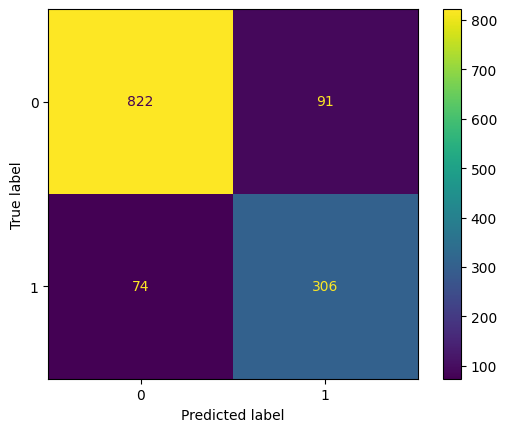

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [34]:
accuracy_score(y_test, y_pred)

0.8723897911832946

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       913
           1       0.77      0.81      0.79       380

    accuracy                           0.87      1293
   macro avg       0.84      0.85      0.85      1293
weighted avg       0.87      0.87      0.87      1293



In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
error = []
for i in range (1,41):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(y_test!=pred))
    

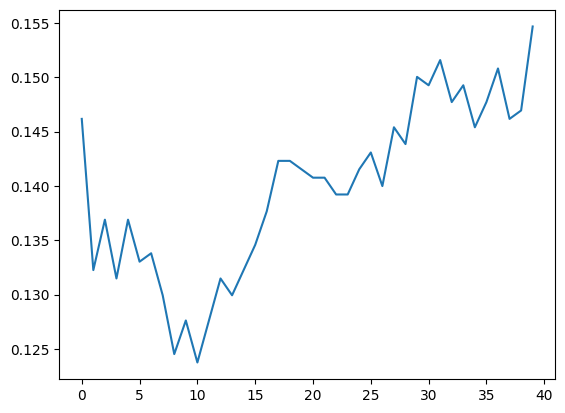

In [29]:
plt.plot(error)

In [38]:
from sklearn.svm import SVC

In [52]:
svm = SVC(kernel='linear')

In [53]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [54]:
y_pred_svm=svm.predict(x_test)

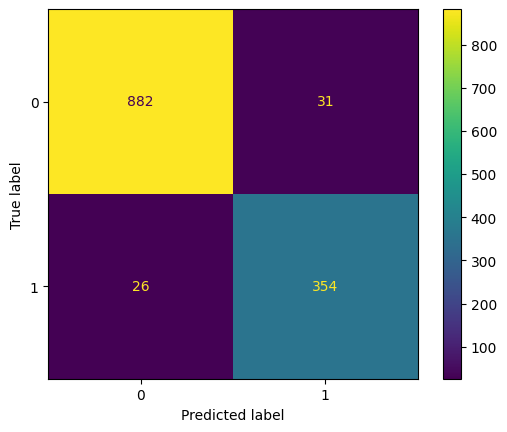

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

In [57]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       913
           1       0.92      0.93      0.93       380

    accuracy                           0.96      1293
   macro avg       0.95      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293



In [55]:
accuracy_score(y_test, y_pred_svm)

0.9559164733178654